# Machine Learning Pipeline - Model Training with Selected Features

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline.

We will discuss:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. **Model Training**
5. Obtaining Predictions / Scoring

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

# to save the model
import joblib

# algorithms to build and train the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables
X_train = pd.read_csv('xtrain_unscaled.csv')
X_test = pd.read_csv('xtest_unscaled.csv')

In [3]:
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

In [4]:
# load the pre-selected features
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

# display the final feature set
features 

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2']

In [5]:
# reduce the train and test set to the selected features
X_train = X_train[features]
X_test = X_test[features]

In [6]:
X_train.columns

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],
      dtype='object')

Our model won't require scaling our features because all our selected features are binary, i.e. either 0 or 1 values.

# Model Training

To train the model, we will be trying the following learning approaches:

- Logistic Regression
- Decision Trees
- Random Forests
- Nearest Neighbors
- Support Vector Machines

Our metric of priority will be the f-1 score for the 'Y' label, i.e. the 1 class considering the imbalanced nature of the dataset.

In [7]:
# dictionary to store the f1 scores and accuracy scores of the models
f1_scores = {}
accuracy_scores = {}

## Logistic Regression

In [8]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train['Response'])
log_preds = log_model.predict(X_test)

f1_scores['log_model'] = f1_score(y_test,log_preds)
accuracy_scores['log_model'] = accuracy_score(y_test,log_preds)

print(confusion_matrix(y_test,log_preds))
print()
print(classification_report(y_test,log_preds))

[[364   4]
 [ 64  16]]

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       368
           1       0.80      0.20      0.32        80

    accuracy                           0.85       448
   macro avg       0.83      0.59      0.62       448
weighted avg       0.84      0.85      0.81       448



## Decision Tree

In [9]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train['Response'])
tree_preds = tree_model.predict(X_test)

f1_scores['tree_model'] = f1_score(y_test,tree_preds)
accuracy_scores['tree_model'] = accuracy_score(y_test,tree_preds)

print(confusion_matrix(y_test,tree_preds))
print()
print(classification_report(y_test,tree_preds))

[[365   3]
 [ 66  14]]

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       368
           1       0.82      0.17      0.29        80

    accuracy                           0.85       448
   macro avg       0.84      0.58      0.60       448
weighted avg       0.84      0.85      0.80       448



## Random Forests

In [10]:
forest_model = RandomForestClassifier(n_estimators=200,random_state=0)
forest_model.fit(X_train,y_train['Response'])
forest_preds = forest_model.predict(X_test)

f1_scores['forest_model'] = f1_score(y_test,forest_preds)
accuracy_scores['forest_model'] = accuracy_score(y_test,forest_preds)

print(confusion_matrix(y_test,forest_preds))
print()
print(classification_report(y_test,forest_preds))

[[365   3]
 [ 66  14]]

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       368
           1       0.82      0.17      0.29        80

    accuracy                           0.85       448
   macro avg       0.84      0.58      0.60       448
weighted avg       0.84      0.85      0.80       448



## Nearest Neighbors

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train['Response'])
knn_preds = knn_model.predict(X_test)

f1_scores['knn_model'] = f1_score(y_test,knn_preds)
accuracy_scores['knn_model'] = accuracy_score(y_test,knn_preds)

print(confusion_matrix(y_test,knn_preds))
print()
print(classification_report(y_test,knn_preds))

[[365   3]
 [ 66  14]]

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       368
           1       0.82      0.17      0.29        80

    accuracy                           0.85       448
   macro avg       0.84      0.58      0.60       448
weighted avg       0.84      0.85      0.80       448



## Support Vector Machines

In [12]:
svc_model = SVC()
svc_model.fit(X_train,y_train['Response'])
svc_preds = svc_model.predict(X_test)

f1_scores['svc_model'] = f1_score(y_test,svc_preds)
accuracy_scores['svc_model'] = accuracy_score(y_test,svc_preds)

print(confusion_matrix(y_test,svc_preds))
print()
print(classification_report(y_test,svc_preds))

[[365   3]
 [ 66  14]]

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       368
           1       0.82      0.17      0.29        80

    accuracy                           0.85       448
   macro avg       0.84      0.58      0.60       448
weighted avg       0.84      0.85      0.80       448



# Model Evaluation

Let's plot out the f1 scores and the accuracy scores from all our models:

Text(0.5, 1.0, 'Model Evaluation')

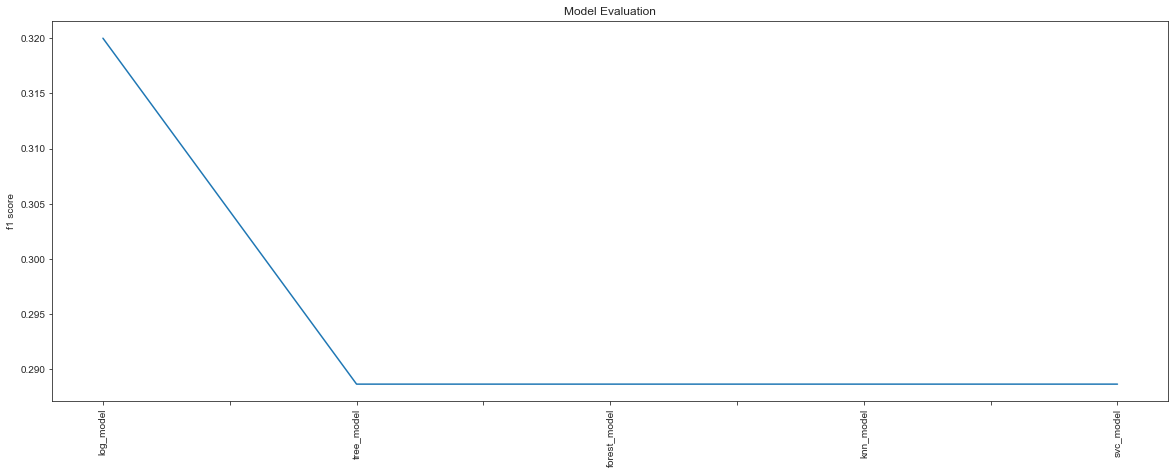

In [13]:
pd.Series(f1_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('f1 score')
plt.title('Model Evaluation')

Text(0.5, 1.0, 'Model Evaluation')

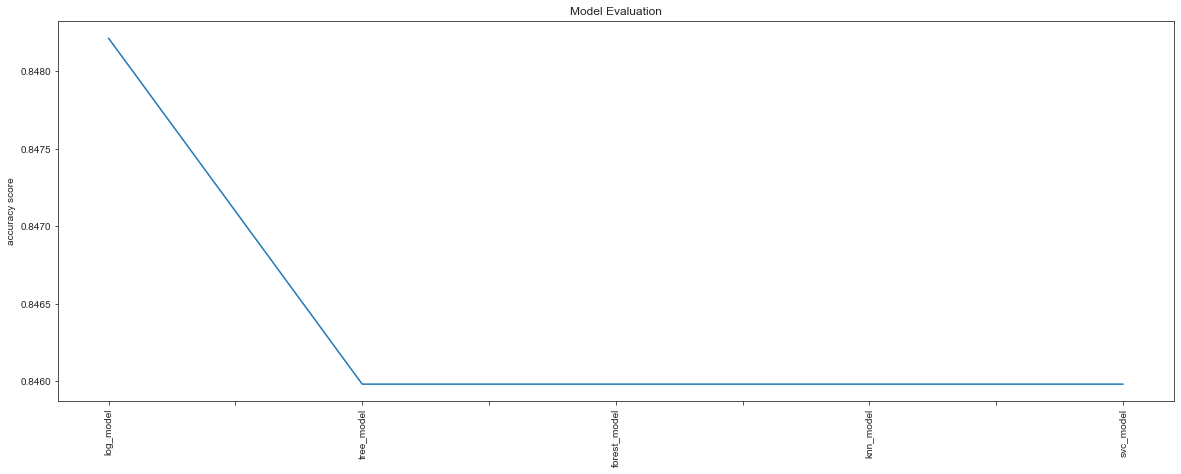

In [14]:
pd.Series(accuracy_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('accuracy score')
plt.title('Model Evaluation')

Like we anticipated, all our model performed quite well on the majority class and quite poorly on the minority class. 

Considering the class imbalance and the poor performance of the minority class, we would have to prioritise the f-1 scores over the misleading accuracy score. Besides the Logisitic Regression model with an f-1 score of 32%, every other model has an f-1 score of 29%.

The low f-1 scores are a result of the recall scores and the harmonic mean effect. The precision scores only look impressive because the model is more familiar with the negative class so it doesn't have to make a lot of false negative selections. However, it doesn't make a lot of true positive picks. Notice how recall has been tainted with a lot of false negative picks.

Putting any of these models in production would be unhelpful because:

- It wouldn't pick enough customers who were interested in future campaigns. This could come at a cost of lost revenue to the company. As such, it would be misleading to plan a marketing budget around the outcomes/preditions of the models.

Let's try adding the features we removed back into the model and observing if it improves the performance of the models.